### Importación de datos



In [66]:
# Importacion de librerias y carga de datos
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


In [45]:
tienda.shape

(2359, 12)

# 1. Análisis de facturación

### Ingreso total por cada tienda

In [46]:
# Calculamos el ingreso total por tienda. Creo un diccionario para almacenar los resultados
ingresos = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

In [47]:
print(ingresos)

{'Tienda 1': np.float64(1150880400.0), 'Tienda 2': np.float64(1116343500.0), 'Tienda 3': np.float64(1098019600.0), 'Tienda 4': np.float64(1038375700.0)}


In [48]:
ingreso_maximo = max(ingresos, key=ingresos.get)
ingreso_minimo = min(ingresos, key=ingresos.get)
print(f"La tienda con mayor ingreso es {ingreso_maximo} con un ingreso de ${ingresos[ingreso_maximo]:,.2f}")
print(f"La tienda con menor ingreso es {ingreso_minimo} con un ingreso de ${ingresos[ingreso_minimo]:,.2f}")

La tienda con mayor ingreso es Tienda 1 con un ingreso de $1,150,880,400.00
La tienda con menor ingreso es Tienda 4 con un ingreso de $1,038,375,700.00


#### Creacion del Dataframe para mejor visualizacion

In [49]:
# Convertimos en DataFrame para visualizar mejor
df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total'])
df_ingresos

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [50]:
# Agrupamos por categoría y contamos cuantos productos se vendieron por
categorias_t1 = tienda.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False)
categorias_t2 = tienda2.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False)
categorias_t3 = tienda3.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False)
categorias_t4 = tienda4.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False)

print('Categorías mas vendidas Tienda 1')
print(categorias_t1)
print('\nCategorías mas vendidas Tienda 2')
print(categorias_t2)

Categorías mas vendidas Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Precio, dtype: int64

Categorías mas vendidas Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Precio, dtype: int64


In [51]:
print('Categorías mas vendidas Tienda 3')
print(categorias_t3)
print('\nCategorías mas vendidas Tienda 4')
print(categorias_t4)

Categorías mas vendidas Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Precio, dtype: int64

Categorías mas vendidas Tienda 4
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: Precio, dtype: int64


# 3. Calificación promedio de la tienda


In [52]:
# Creamos un diccionacionario para almacenar los DataFrames de cada tienda
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}
# Creamos un diccionario para almacenar los promedios de calificaciones
promedios_calificaciones = {}

for nombre, df in tiendas.items():
    promedios_calificaciones[nombre] = df['Calificación'].mean()

print(promedios_calificaciones)


{'Tienda 1': np.float64(3.976685036032217), 'Tienda 2': np.float64(4.037303942348453), 'Tienda 3': np.float64(4.048325561678677), 'Tienda 4': np.float64(3.9957591178965224)}


In [53]:
# Tienda 3 tiene el mayor promedio de calificaciones
mejor_tienda = max(promedios_calificaciones, key=promedios_calificaciones.get)
print(f'La tienda con mejor promedio de calificaciones es {mejor_tienda} con un promedio de {promedios_calificaciones[mejor_tienda]:.2f}')

La tienda con mejor promedio de calificaciones es Tienda 3 con un promedio de 4.05


# 4. Productos más y menos vendidos

In [54]:
# Usamos el diccionario "tiendas" para analizar los productos más y menos vendidos por tienda, creado en el punto anterior
for nombre, df in tiendas.items():
    # Agrupamos por producto y contamos las ventas
    ventas = df.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    
    # Mostramos los top 5 más vendidos
    print(f"\n{nombre}")
    print('Top 5 Productos más vendidos:')
    print(ventas.head(5))
    
    #Mostramos los 5 productos menos vendidos
    print('\n5 Productos con menos ventas:')
    print(ventas.tail(5))


Tienda 1
Top 5 Productos más vendidos:
Producto
TV LED UHD 4K              60
Microondas                 60
Armario                    60
Secadora de ropa           58
Bloques de construcción    56
Name: Precio, dtype: int64

5 Productos con menos ventas:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: Precio, dtype: int64

Tienda 2
Top 5 Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Precio, dtype: int64

5 Productos con menos ventas:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Precio, dtype: int64

Tienda 3
Top 5 Productos más vendidos:
Producto
Kit de bancas      57
Cama king          56
Mesa de comedor    56
Mesa de noche      

In [55]:
# Re usamos el diccionario "tiendas" para analizar los productos más y menos vendidos por tienda, creado en el punto anterior
for nombre, df in tiendas.items():
    # Agrupar por producto y contar ventas
    ventas = df.groupby('Producto')['Precio'].count().sort_values(ascending=False)
    
    # Seleccionar top 3 y bottom 3
    top3 = ventas.head(3)
    bottom3 = ventas.tail(3)
    
    # Convertir a DataFrame para mostrar bonito
    df_top = pd.DataFrame(top3).reset_index()
    df_top.columns = ['Producto', 'Cantidad de Ventas']
    
    df_bottom = pd.DataFrame(bottom3).reset_index()
    df_bottom.columns = ['Producto', 'Cantidad de Ventas']
    
    # Imprimir resultados
    print(f'\n===== {nombre} =====')
    print('\nTop 3 Productos más vendidos:')
    print(df_top.to_string(index=False))  # Sin índice para mejor presentación
    
    print('\n3 Productos con menos ventas:')
    print(df_bottom.to_string(index=False))



===== Tienda 1 =====

Top 3 Productos más vendidos:
     Producto  Cantidad de Ventas
TV LED UHD 4K                  60
   Microondas                  60
      Armario                  60

3 Productos con menos ventas:
                 Producto  Cantidad de Ventas
          Olla de presión                  35
Auriculares con micrófono                  33
             Celular ABXY                  33

===== Tienda 2 =====

Top 3 Productos más vendidos:
                 Producto  Cantidad de Ventas
Iniciando en programación                  65
               Microondas                  62
                  Batería                  61

3 Productos con menos ventas:
       Producto  Cantidad de Ventas
      Impresora                  34
Mesa de comedor                  34
  Juego de mesa                  32

===== Tienda 3 =====

Top 3 Productos más vendidos:
       Producto  Cantidad de Ventas
  Kit de bancas                  57
      Cama king                  56
Mesa de comedor        

# 5. Envío promedio por tienda

In [56]:
# Calculamos el costo promedio de envio por tienda, usando el diccionario "tiendas"
promedios_envio = {}

for nombre, df in tiendas.items():
    promedios_envio[nombre] = df['Costo de envío'].mean()

#Imprimimos el costo promedio de envio por tienda con 2 decimales
for nombre, valor in promedios_envio.items():
    print(f'Costo promedio de envio {nombre}: ${valor:.2f}')

Costo promedio de envio Tienda 1: $26018.61
Costo promedio de envio Tienda 2: $25216.24
Costo promedio de envio Tienda 3: $24805.68
Costo promedio de envio Tienda 4: $23459.46


# 6. Generando gráficos

### Visualizacion grafica de productos mas vendidos por tienda

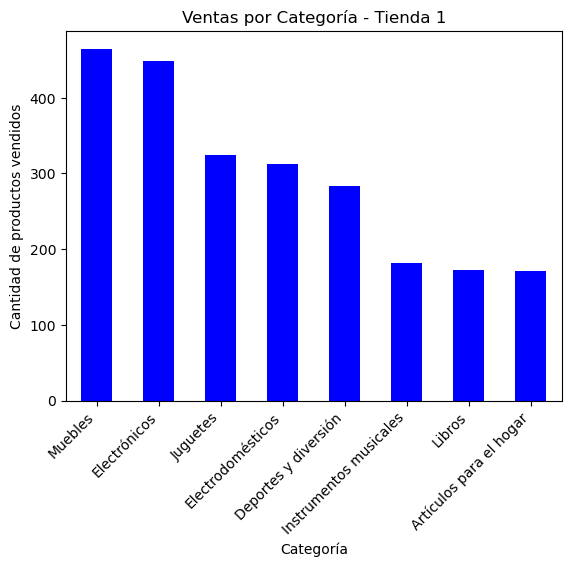

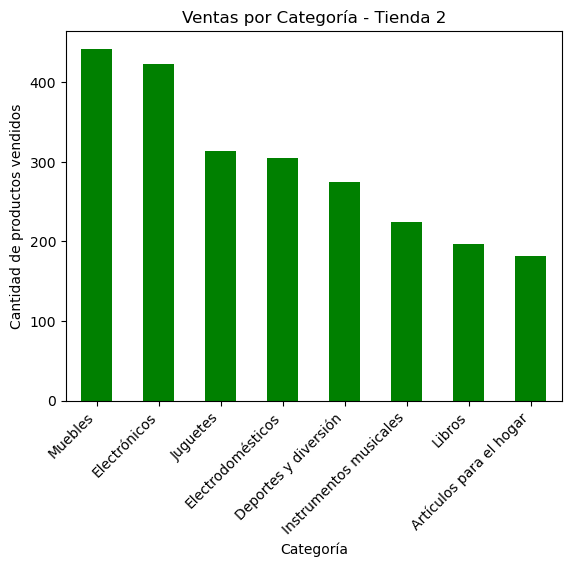

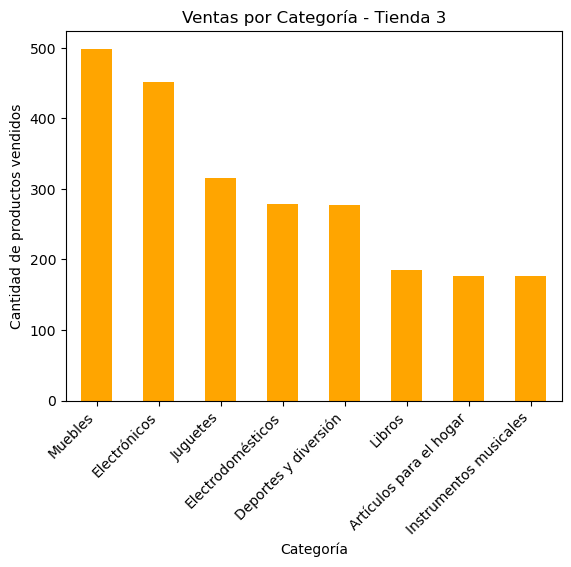

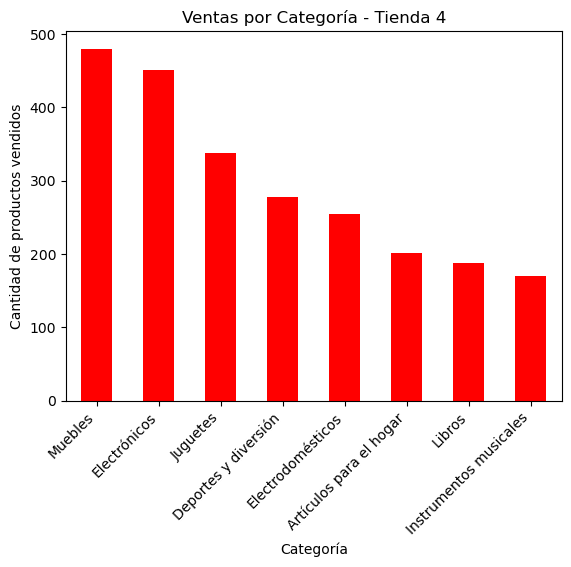

In [57]:
categorias_t1.plot(kind='bar', color='blue', title='Ventas por Categoría - Tienda 1') # Grafico de barras
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right') # Ajuste de etiquetas a 45 grados
plt.show()

categorias_t2.plot(kind='bar', color='green', title='Ventas por Categoría - Tienda 2')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.show()

categorias_t3.plot(kind='bar', color='orange', title='Ventas por Categoría - Tienda 3')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.show()

categorias_t4.plot(kind='bar', color='red', title='Ventas por Categoría - Tienda 4')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.show()

### Visualizacion grafica de ingresos totales por tienda

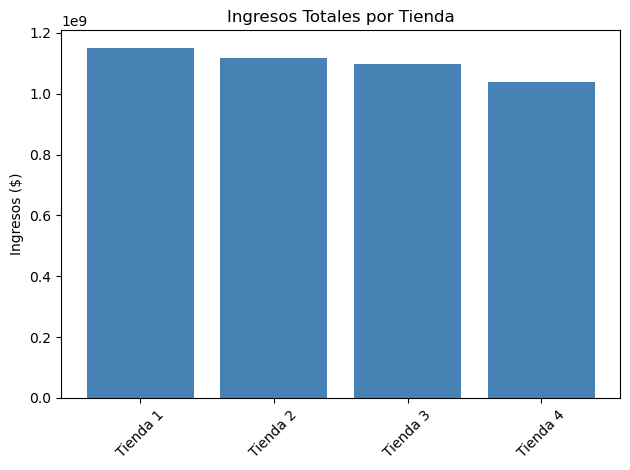

In [58]:
ingresos = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingresos'])
df_ingresos.sort_values('Ingresos', ascending=False, inplace=True)

plt.bar(df_ingresos['Tienda'], df_ingresos['Ingresos'], color='steelblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualizacion grafica de categorías más vendidas por tienda

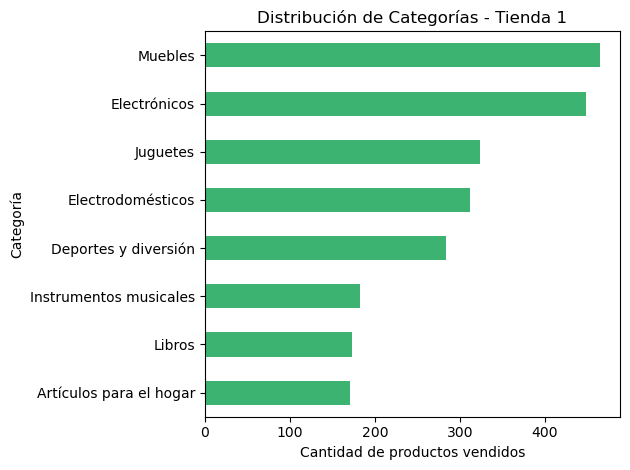

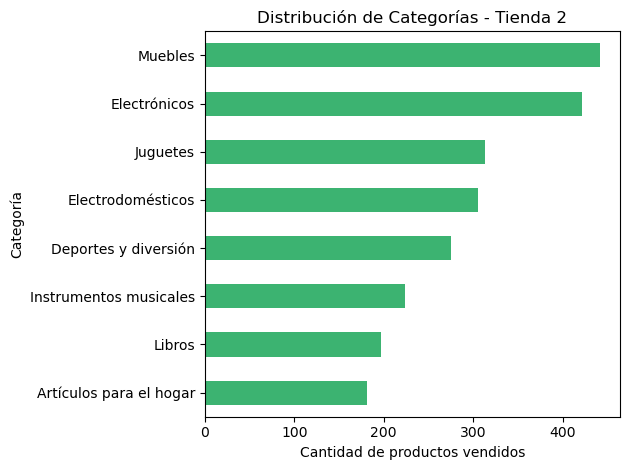

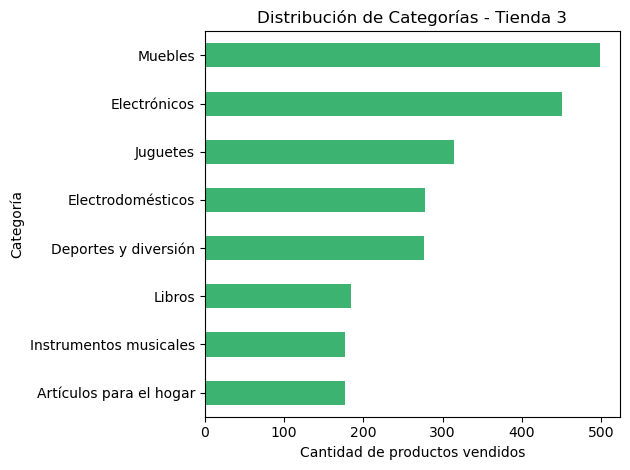

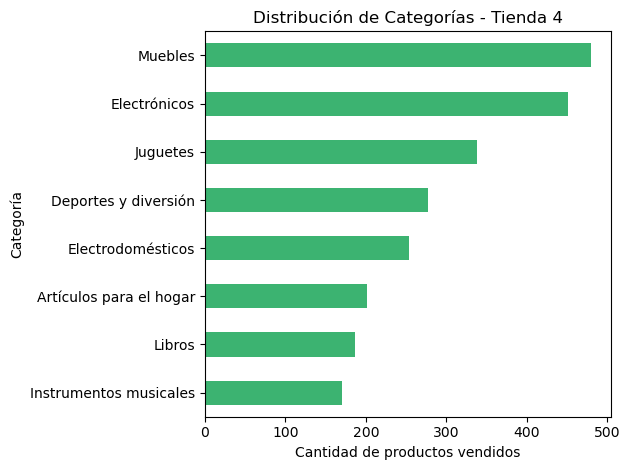

In [59]:
for nombre, df in tiendas.items():
    categorias = df.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=True)
    categorias.plot(kind="barh", color="mediumseagreen", title=f'Distribución de Categorías - {nombre}')
    plt.xlabel('Cantidad de productos vendidos')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()



# Informe Final: Análisis de Tiendas Alura Store

### Introducción:

El objetivo de este análisis fue ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento.
Se evaluaron distintas métricas clave: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de clientes, productos más y menos vendidos, y costo promedio de envío.
Se generaron visualizaciones que permiten interpretar los datos de forma clara y objetiva.

### Análisis de Ingresos Totales:

Se calcularon los ingresos totales de cada tienda sumando el precio de todos los productos vendidos.

La tienda con mayores ingresos fue Tienda 1 con un valor de $1,150,880,400.00 , mientras que la de menores ingresos fue Tienda 4 con un valor de de $1,038,375,700.00
Esto indica que algunas tiendas tienen un mejor desempeño financiero que otras.

### Distribución de Categorías de Productos:

La categoría más vendida en la mayoría de las tiendas fue "Muebles", mientras que las menos vendidas fueron "Articulos para el Hogar".
Esta información permite identificar las áreas fuertes y débiles de cada tienda.

### Calificaciones Promedio de los Clientes:

La tienda con mayor satisfacción fue Tienda 3 con una puntuacion de "4.04", mientras que la de menor calificación fue Tienda 1 con puntuacion de "3.97".
Las calificaciones están en un rango de 0 a 5, siendo valores cercanos a 5 indicativos de clientes altamente satisfechos.

### Productos Más y Menos Vendidos

Se identificaron los productos con mayor y menor número de ventas en cada tienda, mostrando cuáles destacan y cuáles no generan tanta demanda:

===== Tienda 1 =====

Top 3 Productos más vendidos:
TV LED UHD 4K                  (60)
   Microondas                  (60)
      Armario                  (60)

3 Productos con menos ventas
          Olla de presión                  (35)
Auriculares con micrófono                  (33)
             Celular ABXY                  (33)

===== Tienda 2 =====

Top 3 Productos más vendidos:
Iniciando en programación                  (65)
               Microondas                  (62)
                  Batería                  (61)

3 Productos con menos ventas:
      Impresora                  (34)
Mesa de comedor                  (34)
  Juego de mesa                  (32)

===== Tienda 3 =====

Top 3 Productos más vendidos:
  Kit de bancas                  (57)
      Cama king                  (56)
Mesa de comedor                  (56)

3 Productos con menos ventas:
             Microondas                  (36)
           Set de vasos                  (36)
Bloques de construcción                  (35)

===== Tienda 4 =====

Top 3 Productos más vendidos:
               Cama box                  (62)
             Cubertería                  (59)
Dashboards con Power BI                  (56)

3 Productos con menos ventas:
 Guitarra acústica                  (37)
           Armario                  (34)
Guitarra eléctrica                  (33)


#### Observación: 
 Algunos productos clave contribuyen significativamente a los ingresos y a la popularidad de la tienda. 
 Los productos menos vendidos podrían ser candidatos para reemplazo o promoción.

### Costo Promedio de Envío

Se calculó el costo de envío promedio por tienda obteniendo los siguientes valores:

Costo promedio de envio Tienda 1: $26018.61

Costo promedio de envio Tienda 2: $25216.24

Costo promedio de envio Tienda 3: $24805.68

Costo promedio de envio Tienda 4: $23459.46

Una tienda con un costo de envío significativamente más alto como "Tienda 1" puede afectar la percepción del cliente.

Las tiendas con costos de envío moderados o bajos como "Tienda 4" y "Tienda 3" tienen ventaja competitiva en satisfacción.

# Conclusion Final:

### Si la prioridad es deshacerte de la tienda con el peor desempeño general en términos de rentabilidad y satisfacción del cliente (considerando calificación y costos de envío), la Tienda 1 podría ser una candidata. Sin embargo, si la principal preocupación son los ingresos absolutos más bajos, entonces sería la Tienda 4.

# Extra: Análisis del desempeño geográfico

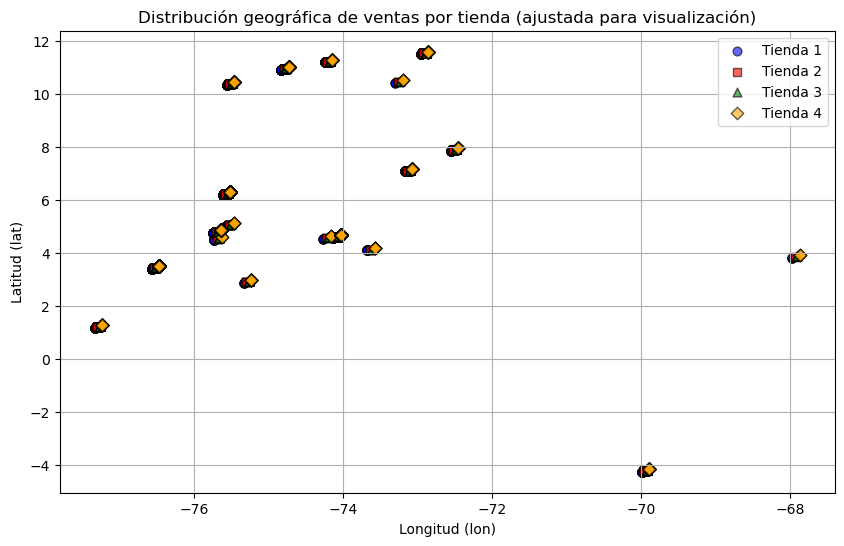

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

colores = ['blue', 'red', 'green', 'orange']
marcadores = ['o', 's', '^', 'D']

for (nombre, df), color, marcador, offset in zip(tiendas.items(), colores, marcadores, np.linspace(-0.05, 0.05, 4)):
    plt.scatter(df['lon'] + offset, df['lat'] + offset,
                alpha=0.6, s=40, label=nombre,
                color=color, marker=marcador, edgecolors='black')

plt.title('Distribución geográfica de ventas por tienda (ajustada para visualización)')
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
import folium
from folium.plugins import HeatMap

# Crear mapa base (centrado en Argentina, ajustá si tus datos están en otra región)
mapa = folium.Map(location=[-34.6, -58.4], zoom_start=5)

# Agregar heatmap para cada tienda
for nombre, df in tiendas.items():
    datos = df[['lat', 'lon']].dropna().values.tolist()
    HeatMap(datos, radius=8, blur=10, min_opacity=0.4, name=nombre).add_to(mapa)

folium.LayerControl().add_to(mapa)

# Guardar mapa interactivo
mapa.save('/Users/ernesto/Documents/GitHub/challenge1-data-science-latam-main/mapa_ventas_alura_store.html')


mapa
